In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
def load_dataset():
    # Load the dataset using pandas read_csv() function
    my_paypal_creditcard_dataset = pd.read_csv('my_paypal_creditcard.csv')  # 'my_paypal_creditcard.csv' is file path
    
    # Return the DataFrame
    return my_paypal_creditcard_dataset

# Load the dataset into a DataFrame
my_paypal_creditcard_dataframe = load_dataset()

# Print the first few rows of the DataFrame
print(my_paypal_creditcard_dataframe.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
def print_summarize_dataset(dataset):
   # Print dataset dimension
   print("Dataset dimension:")
   print(dataset.shape)
   
   # Print first 10 rows of dataset
   print("First 10 rows of dataset:")
   print(dataset.head(10))
   
   # Print statistical summary
   print("Statistical summary:")
   print(dataset.describe())

# Call the function with the my_paypal_creditcard_dataframe dataset
print_summarize_dataset(my_paypal_creditcard_dataframe)

Dataset dimension:
(253505, 31)
First 10 rows of dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22    

In [5]:
def clean_dataset(my_paypal_creditcard_dataframe):
    # Drop rows with missing values
    cleaned_dataframe = my_paypal_creditcard_dataframe.dropna()

    # Return the cleaned DataFrame
    return cleaned_dataframe

# Load the dataset into a DataFrame
my_paypal_creditcard_dataframe = load_dataset()

# Clean the dataset
cleaned_dataframe = clean_dataset(my_paypal_creditcard_dataframe)

# Verify the result
print(cleaned_dataframe.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
print("Column names:", my_paypal_creditcard_dataframe.columns)

Column names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


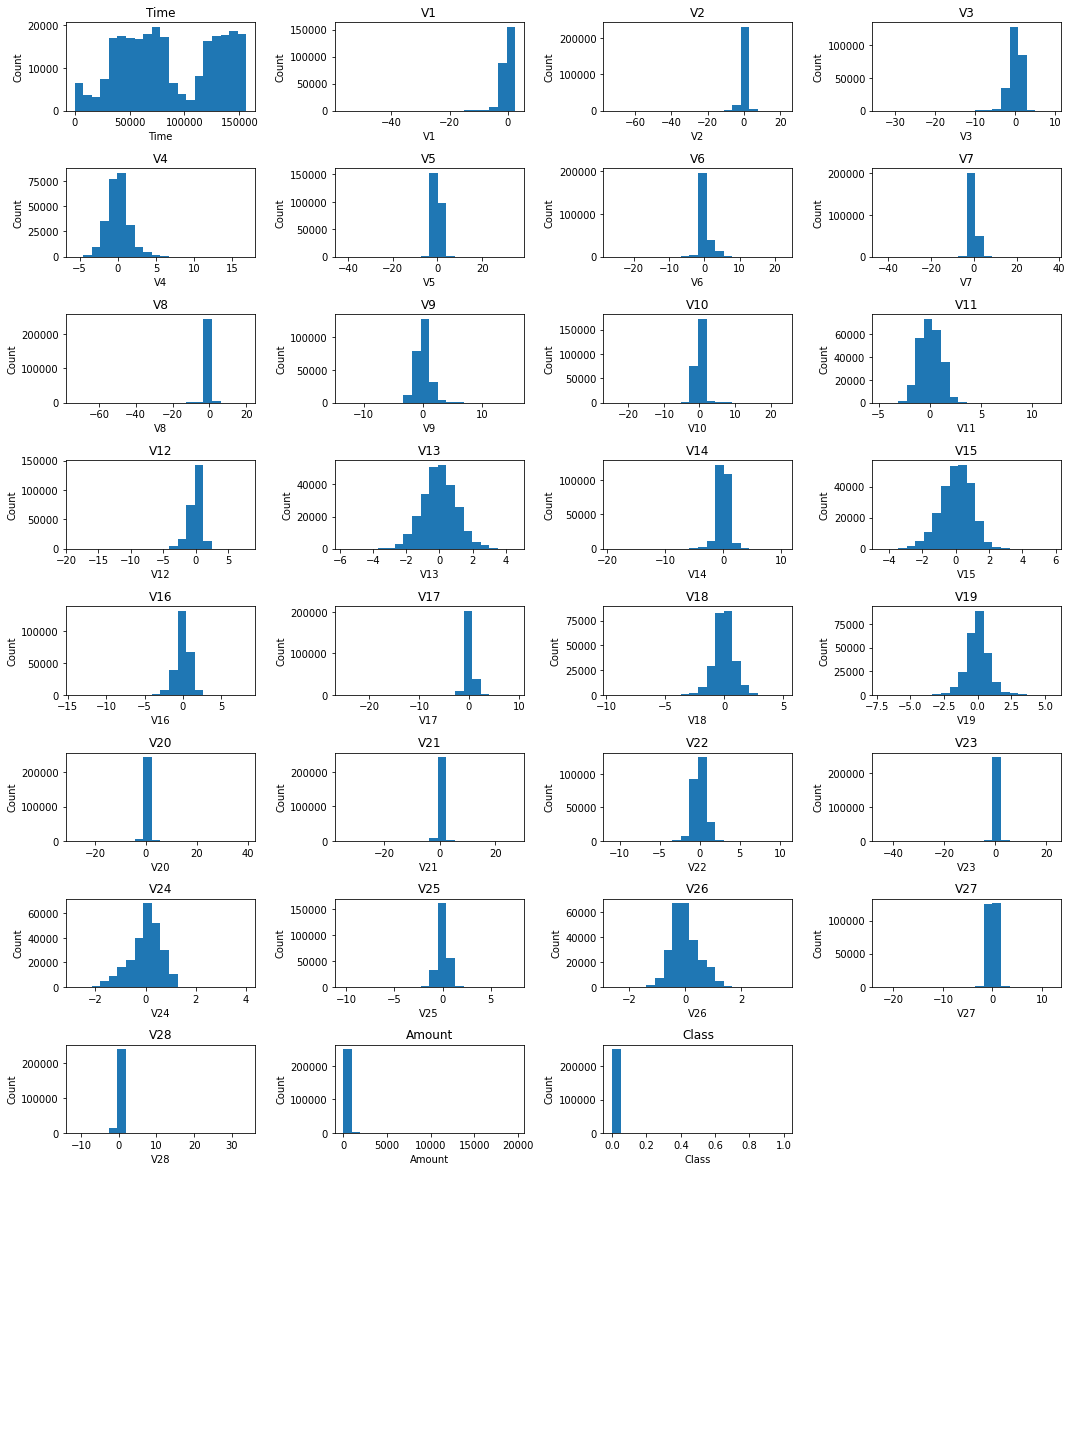

In [7]:
def print_histograms(dataset):
    # Get the numerical columns
    numerical_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

    # Create subplots
    fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(15, 20))
    axs = axs.flatten()

    # Plot histograms for numerical columns
    for i, col in enumerate(numerical_cols):
        axs[i].hist(dataset[col], bins=20)
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')

    # Hide any extra subplots
    for j in range(len(numerical_cols), len(axs)):
        axs[j].axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

print_histograms(cleaned_dataframe)


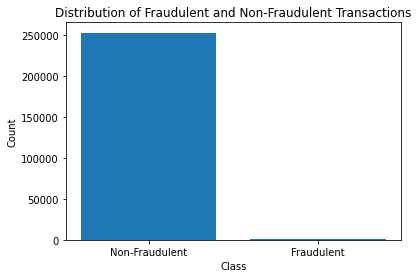

In [8]:
def visualize_class(dataset):
    # Count the number of occurrences for each class
    class_counts = dataset['Class'].value_counts()

    # Plot the class distribution
    plt.figure(figsize=(6, 4))
    plt.bar(class_counts.index, class_counts.values)
    plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
    plt.show()

visualize_class(cleaned_dataframe)


From the above histogram, we can see that this dataset is highly unbalanced showing 492 fraudulent and 284,315 non-fraudulent transactions. How do I balance the dataset? By calculating class weights; this will assign higher weights to the minority class (fraudulent transactions) and lower weights to the majority class (non-fraudulent transactions).Class weights will address the issue of class imbalance during model training.

This is because the model's objective is to minimize the overall error rate, and in doing so, it may prioritize the accuracy of the majority class while neglecting the minority class. Thereby assigning appropriate class weights, one can balance the influence of each class during training, giving more importance to the minority class. This ensures that the model is equally trained on both classes and pays sufficient attention to the minority class, improving its ability to detect and correctly classify instances from the minority class.

Overall, using class weights improve the performance of the model on the minority(fraudulent) class in an imbalanced dataset.

# PREDITIONS

In [9]:
# Assuming you have X_train and y_train as your training data and labels
# Split the dataset into training and testing sets
X = cleaned_dataframe.drop('Class', axis=1)
y = cleaned_dataframe['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create an instance of Logistic Regression with class weights
logreg = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.5009336791404224, 1: 268.2579365079365})

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Split the dataset into training and testing sets
X = cleaned_dataframe.drop('Class', axis=1)
y = cleaned_dataframe['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
auprc = average_precision_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("ROC AUC: {:.2f}%".format(roc_auc * 100))
print("AUPRC:", auprc)

Accuracy: 99.91%
Precision: 75.00%
Recall: 75.00%
F1-score: 75.00%
ROC AUC: 87.48%
AUPRC: 0.562933916490799


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Clean the dataset
cleaned_dataframe = clean_dataset(my_paypal_creditcard_dataframe)

# Split the dataset into training and testing sets
X = cleaned_dataframe.drop('Class', axis=1)
y = cleaned_dataframe['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of Random Forest classifier
rf = RandomForestClassifier()

# Create an instance of Random Forest classifier with class weights
rf = RandomForestClassifier(class_weight={0: 1, 1: 100})  # Adjust the class weights as per your requirements


# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50613
         1.0       0.97      0.82      0.89        88

    accuracy                           1.00     50701
   macro avg       0.99      0.91      0.94     50701
weighted avg       1.00      1.00      1.00     50701



# CONCLUSION